### Importação dos dados



Importando o Dataset

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

Conhecendo o Dataset

In [2]:
loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [3]:
loja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


#1. Análise do faturamento


In [4]:
faturamento_total_loja = sum(loja['Preço'])
faturamento_total_loja2 = sum(loja2['Preço'])
faturamento_total_loja3 = sum(loja3['Preço'])
faturamento_total_loja4 = sum(loja4['Preço'])

In [5]:
# Relatório de Faturamento

faturamento_tabela = {
  'Loja 1': round(faturamento_total_loja,2),
  'Loja 2': round(faturamento_total_loja2,2),
  'Loja 3': round(faturamento_total_loja3,2),
  'Loja 4': round(faturamento_total_loja4,2)}

df = pd.DataFrame(list(faturamento_tabela.items()), columns=['Loja', 'Faturamento'])
df['Faturamento'] = df['Faturamento'].apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))

print("RELATÓRIO DE FATURAMENTO")
print("-" * 25)
print(df[['Loja', 'Faturamento']].to_string(index=False))

faturamento_maximo = df['Faturamento'].max()
faturamento_minimo = df['Faturamento'].min()
loja_maxima = df[df['Faturamento'] == faturamento_maximo]['Loja'].iloc[0]
loja_minima = df[df['Faturamento'] == faturamento_minimo]['Loja'].iloc[0]

print(f'\nFaturamento Máximo: {faturamento_maximo} - {loja_maxima}')
print(f'Faturamento Mínimo: {faturamento_minimo} - {loja_minima}')

RELATÓRIO DE FATURAMENTO
-------------------------
  Loja     Faturamento
Loja 1 R$ 1.534.509,12
Loja 2 R$ 1.488.459,06
Loja 3 R$ 1.464.025,03
Loja 4 R$ 1.384.497,58

Faturamento Máximo: R$ 1.534.509,12 - Loja 1
Faturamento Mínimo: R$ 1.384.497,58 - Loja 4


In [6]:
# Análise Extra = Produtos vendidos (% e total)

produtos_loja = len(loja)
produtos_loja2 = len(loja2)
produtos_loja3 = len(loja3)
produtos_loja4 = len(loja4)
produtos_total = sum([produtos_loja, produtos_loja2, produtos_loja3, produtos_loja4])

print('RELATÓRIO DE VENDAS DE PRODUTOS')
print('-' * 32)
print(f'O total de produtos vendidos nas 4 lojas é de: {produtos_total}')

# Análise Extra = Produtos vendidos (por loja, % do total)

percentual_loja = {
    'Loja 1': round((produtos_loja / produtos_total) * 100,2),
    'Loja 2': round((produtos_loja2 / produtos_total) * 100,2),
    'Loja 3': round((produtos_loja3 / produtos_total) * 100,2),
    'Loja 4': round((produtos_loja4 / produtos_total) * 100,2)
}

df2 = pd.DataFrame(list(percentual_loja.items()), columns=['Loja', 'Percentual'])
df2['Percentual'] = df2['Percentual'].apply(lambda x: f'{x}%')

print("-" * 52)
print(df2[['Loja', 'Percentual']].to_string(index=False))

RELATÓRIO DE VENDAS DE PRODUTOS
--------------------------------
O total de produtos vendidos nas 4 lojas é de: 9435
----------------------------------------------------
  Loja Percentual
Loja 1      25.0%
Loja 2      25.0%
Loja 3      25.0%
Loja 4     24.99%


# 2. Vendas por Categoria


In [7]:
print(type(loja))

<class 'pandas.core.frame.DataFrame'>


In [8]:
categorias_unicas = loja['Categoria do Produto'].unique()
print(f'As categorias dos produtos são: {list(categorias_unicas)}')

As categorias dos produtos são: ['eletronicos', 'moveis', 'brinquedos', 'eletrodomesticos', 'utilidades domesticas', 'esporte e lazer', 'livros', 'instrumentos musicais']


In [9]:
# Venda por categoria por loja

#Loja 1
vendas_total_loja = loja['Categoria do Produto'].value_counts()
preco_total_loja = loja.groupby('Categoria do Produto')['Preço'].sum()

#Loja 2
vendas_total_loja2 = loja2['Categoria do Produto'].value_counts()
preco_total_loja2 = loja2.groupby('Categoria do Produto')['Preço'].sum()

#Loja 3
vendas_total_loja3 = loja3['Categoria do Produto'].value_counts()
preco_total_loja3 = loja3.groupby('Categoria do Produto')['Preço'].sum()

#Loja 4
vendas_total_loja4 = loja4['Categoria do Produto'].value_counts()
preco_total_loja4 = loja4.groupby('Categoria do Produto')['Preço'].sum()

#Transformar em tabela para exibição

tabela_loja1 = pd.DataFrame({
    'Categoria': vendas_total_loja.index,
    'Quantidade': vendas_total_loja.values,
    'Preço Total': [preco_total_loja.get(cat, 0) for cat in vendas_total_loja.index]
})
print('=== LOJA 1 ===')
print(tabela_loja1.to_string(index=False))
print()

# Loja 2
tabela_loja2 = pd.DataFrame({
    'Categoria': vendas_total_loja2.index,
    'Quantidade': vendas_total_loja2.values,
    'Preço Total': [preco_total_loja2.get(cat, 0) for cat in vendas_total_loja2.index]
})
print('=== LOJA 2 ===')
print(tabela_loja2.to_string(index=False))
print()

# Loja 3
tabela_loja3 = pd.DataFrame({
    'Categoria': vendas_total_loja3.index,
    'Quantidade': vendas_total_loja3.values,
    'Preço Total': [preco_total_loja3.get(cat, 0) for cat in vendas_total_loja3.index]
})
print('=== LOJA 3 ===')
print(tabela_loja3.to_string(index=False))
print()

# Loja 4
tabela_loja4 = pd.DataFrame({
    'Categoria': vendas_total_loja4.index,
    'Quantidade': vendas_total_loja4.values,
    'Preço Total': [preco_total_loja4.get(cat, 0) for cat in vendas_total_loja4.index]
})
print('=== LOJA 4 ===')
print(tabela_loja4.to_string(index=False))
print()


# Venda por categoria total

vendas_total_total = pd.concat([loja, loja2, loja3, loja4])
vendas_quantidade_total = vendas_total_total['Categoria do Produto'].value_counts()
preco_total_total = vendas_total_total.groupby('Categoria do Produto')['Preço'].sum()

tabela_total = pd.DataFrame({
    'Categoria': vendas_quantidade_total.index,
    'Quantidade': vendas_quantidade_total.values,
    'Preço Total': [preco_total_total.get(cat, 0) for cat in vendas_quantidade_total.index]
})

print('=== TOTAL GERAL ===')
print(tabela_total.to_string(index=False))

=== LOJA 1 ===
            Categoria  Quantidade  Preço Total
               moveis         465    250178.11
          eletronicos         448    572659.23
           brinquedos         324     23993.78
     eletrodomesticos         312    484913.36
      esporte e lazer         284     52387.55
instrumentos musicais         182    121731.69
               livros         173     11713.92
utilidades domesticas         171     16931.48

=== LOJA 2 ===
            Categoria  Quantidade  Preço Total
               moveis         442    235234.68
          eletronicos         422    547773.71
           brinquedos         313     21262.21
     eletrodomesticos         305    464758.13
      esporte e lazer         275     46326.09
instrumentos musicais         224    139987.03
               livros         197     13454.35
utilidades domesticas         181     19662.86

=== LOJA 3 ===
            Categoria  Quantidade  Preço Total
               moveis         499    268095.56
          ele

In [10]:
# Análise Extra (Ticket Médio de cada loja)

ticket_medio_loja = {
    'Loja 1': round(sum(loja['Preço']) / len(loja),2),
    'Loja 2': round(sum(loja2['Preço']) / len(loja2),2),
    'Loja 3': round(sum(loja3['Preço']) / len(loja3),2),
    'Loja 4': round(sum(loja4['Preço']) / len(loja4),2)}

df_ticket = pd.DataFrame(list(ticket_medio_loja.items()),
                        columns=['Loja', 'Ticket Médio R$'])

print("=== TICKET MÉDIO POR LOJA ===")
print(df_ticket.to_string(index=False))
print()

=== TICKET MÉDIO POR LOJA ===
  Loja  Ticket Médio R$
Loja 1           650.49
Loja 2           630.97
Loja 3           620.61
Loja 4           587.15



# 3. Média de Avaliação das Lojas

In [11]:
# Avaliação de clientes (por loja)

from statistics import mean

media_avaliacao_loja = {
    'Loja 1': float(round(loja['Avaliação da compra'].mean(), 2)),
    'Loja 2': float(round(loja2['Avaliação da compra'].mean(), 2)),
    'Loja 3': float(round(loja3['Avaliação da compra'].mean(), 2)),
    'Loja 4': float(round(loja4['Avaliação da compra'].mean(), 2))
}

df_avaliacao = pd.DataFrame(list(media_avaliacao_loja.items()),
                        columns=['Loja', 'Avaliação (1 a 5)'])

print("=== AVALIAÇÃO MÉDIA POR LOJA ===")
print(df_avaliacao.to_string(index=False))
print()

# Avaliação de clientes (média)

media_avaliacao_total = (media_avaliacao_loja['Loja 1'] + media_avaliacao_loja['Loja 2'] + media_avaliacao_loja['Loja 3'] + media_avaliacao_loja['Loja 4']) / 4

print("=== AVALIAÇÃO MÉDIA TOTAL (1 a 5) ===")

print(round(media_avaliacao_total,2))

=== AVALIAÇÃO MÉDIA POR LOJA ===
  Loja  Avaliação (1 a 5)
Loja 1               3.98
Loja 2               4.04
Loja 3               4.05
Loja 4               4.00

=== AVALIAÇÃO MÉDIA TOTAL (1 a 5) ===
4.02


# 4. Produtos Mais e Menos Vendidos

In [12]:
# Contagem de produtos total

agrupar_lojas = pd.concat([loja, loja2, loja3, loja4])
agrupar_lojas = agrupar_lojas['Produto'].value_counts()

print("=== 10 PRODUTOS MAIS VENDIDOS TOTAL ===")
print(agrupar_lojas.head(10))

print("=== 10 PRODUTOS MENOS VENDIDOS TOTAL ===")
print(agrupar_lojas.tail(10))

=== 10 PRODUTOS MAIS VENDIDOS TOTAL ===
Produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
Secadora de roupas          200
Modelagem preditiva         200
Jogo de panelas             200
Cama box                    199
Blocos de montar            199
Name: count, dtype: int64
=== 10 PRODUTOS MENOS VENDIDOS TOTAL ===
Produto
Panela de pressão              172
Smartwatch                     172
Jogo de copos                  169
Poltrona                       168
Assistente virtual             167
Ciência de dados com python    166
Guitarra                       165
Mochila                        163
Headset                        158
Celular ABXY                   157
Name: count, dtype: int64


In [13]:
# Contagem de produtos por loja (1 e 4)

produtos_loja = loja['Produto'].value_counts()
produtos_loja2 = loja2['Produto'].value_counts()
produtos_loja3 = loja3['Produto'].value_counts()
produtos_loja4 = loja4['Produto'].value_counts()

print("=== 10 PRODUTOS MAIS VENDIDOS LOJA 1 ===")
print(produtos_loja.head(10))

print("=== 10 PRODUTOS MENOS VENDIDOS LOJA 1 ===")
print(produtos_loja.tail(10))

print("=== 10 PRODUTOS MAIS VENDIDOS LOJA 4 ===")
print(produtos_loja4.head(10))

print("=== 10 PRODUTOS MENOS VENDIDOS LOJA 4 ===")
print(produtos_loja4.tail(10))

=== 10 PRODUTOS MAIS VENDIDOS LOJA 1 ===
Produto
Micro-ondas           60
TV Led UHD 4K         60
Guarda roupas         60
Secadora de roupas    58
Cômoda                56
Blocos de montar      56
Bola de basquete      55
Bicicleta             54
Copo térmico          54
Geladeira             54
Name: count, dtype: int64
=== 10 PRODUTOS MENOS VENDIDOS LOJA 1 ===
Produto
Boneca bebê                    40
Mesa de jantar                 40
Dinossauro Rex                 40
Corda de pular                 40
Mochila                        39
Ciência de dados com python    39
Pandeiro                       36
Panela de pressão              35
Headset                        33
Celular ABXY                   33
Name: count, dtype: int64
=== 10 PRODUTOS MAIS VENDIDOS LOJA 4 ===
Produto
Cama box                    62
Faqueiro                    59
Dashboards com Power BI     56
Cama king                   56
Carrinho controle remoto    55
Mesa de jantar              55
Cômoda                  

# 5. Frete Médio por Loja


In [14]:
# Frete Médio por loja

frete_medio_loja1 = round(loja['Frete'].mean(),2)
frete_medio_loja2 = round(loja2['Frete'].mean(),2)
frete_medio_loja3 = round(loja3['Frete'].mean(),2)
frete_medio_loja4 = round(loja4['Frete'].mean(),2)

print('Frete Médio por Loja')
print(f'Loja 1: R${frete_medio_loja1}')
print(f'Loja 2: R${frete_medio_loja2}')
print(f'Loja 3: R${frete_medio_loja3}')
print(f'Loja 4: R${frete_medio_loja4}')

Frete Médio por Loja
Loja 1: R$34.69
Loja 2: R$33.62
Loja 3: R$33.07
Loja 4: R$31.28


# Gráficos para Análise

In [15]:
pip install matplotlib

In [16]:
import matplotlib.pyplot as plt
import numpy as np

## **Gráficos**

1. Faturamento & Ticket-Médio por Loja

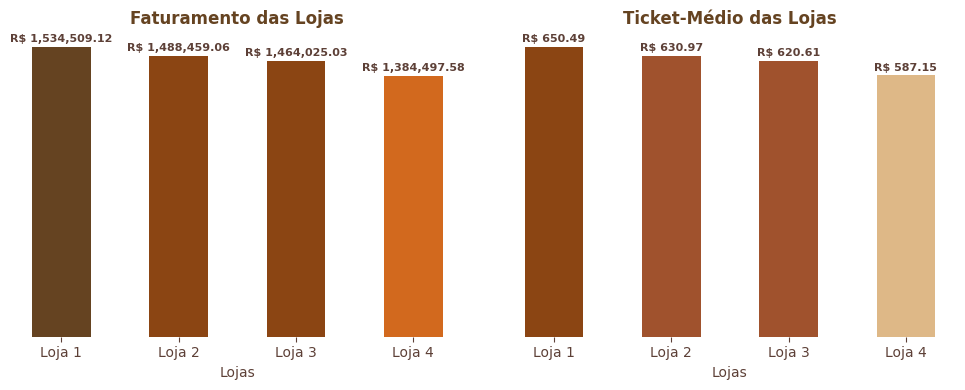

<Figure size 640x480 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamento_lojas = list(faturamento_tabela.values())
ticket_medio = [round(sum(loja['Preço']) / len(loja),2), round(sum(loja2['Preço']) / len(loja2),2), round(sum(loja3['Preço']) / len(loja3),2), round(sum(loja4['Preço']) / len(loja4),2)]

# Configurar cores para faturamento - escala de marrom
faturamento_maximo = max(faturamento_lojas)
faturamento_minimo = min(faturamento_lojas)
cores_faturamento = ['#8B4513'] * len(faturamento_lojas)  # SaddleBrown como padrão

for i, faturamento in enumerate(faturamento_lojas):
    if faturamento == faturamento_maximo:
        cores_faturamento[i] = '#654321'  # Dark Brown - tom mais escuro para destaque positivo
    elif faturamento == faturamento_minimo:
        cores_faturamento[i] = '#D2691E'  # Chocolate - tom mais claro para destaque negativo
    else:
        cores_faturamento[i] = '#8B4513'  # SaddleBrown - tom médio

# Configurar cores para ticket médio - escala de marrom harmonizada
cores_ticket = ['#A0522D'] * len(ticket_medio)  # Sienna como padrão

for i, ticket in enumerate(ticket_medio):
    if ticket == max(ticket_medio):
        cores_ticket[i] = '#8B4513'  # SaddleBrown - tom mais escuro para destaque positivo
    elif ticket == min(ticket_medio):
        cores_ticket[i] = '#DEB887'  # BurlyWood - tom mais claro para destaque negativo
    else:
        cores_ticket[i] = '#A0522D'  # Sienna - tom médio

# Criar subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.subplots_adjust(hspace=0.5, wspace=1.0)

# Gráfico 1 - Faturamento
ax1.bar(lojas, faturamento_lojas, color=cores_faturamento, width=0.5)
ax1.set_title('Faturamento das Lojas', fontweight='bold', color='#654321')
ax1.set_xlabel('Lojas', color='#5D4037')
ax1.set_ylabel('Faturamento', color='#5D4037')

formatter1 = ticker.StrMethodFormatter('R$ {x:,.2f}')
ax1.yaxis.set_major_formatter(formatter1)

# Gráfico 2 - Ticket Médio
ax2.bar(lojas, ticket_medio, color=cores_ticket, width=0.5)
ax2.set_title('Ticket-Médio das Lojas', fontweight='bold', color='#654321')
ax2.set_xlabel('Lojas', color='#5D4037')
ax2.set_ylabel('Ticket-Médio', color='#5D4037')

# colocando rótulos nos gráficos
for i, v in enumerate(faturamento_lojas):
    ax1.text(i, v + max(faturamento_lojas) * 0.01, f'R$ {v:,.2f}',
             color='#5D4037', fontsize=8, ha='center', va='bottom', fontweight='bold')

for i, v in enumerate(ticket_medio):
    ax2.text(i, v + max(ticket_medio) * 0.01, f'R$ {v:,.2f}',
             color='#5D4037', fontsize=8, ha='center', va='bottom', fontweight='bold')

# formatando em formato de R$XX,00
formatter2 = ticker.StrMethodFormatter('R$ {x:,.2f}')
ax2.yaxis.set_major_formatter(formatter2)

# formatando o gráfico
ax1.set_frame_on(False)
ax2.set_frame_on(False)
ax1.get_yaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

# Alterando a cor dos ticks dos eixos x para harmonizar
ax1.tick_params(axis='x', colors='#5D4037')
ax2.tick_params(axis='x', colors='#5D4037')

plt.tight_layout()
plt.show()

# salvando os gráficos
plt.savefig('faturamento_ticket_lojas.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')

2. Avaliação Média de Clientes por Loja

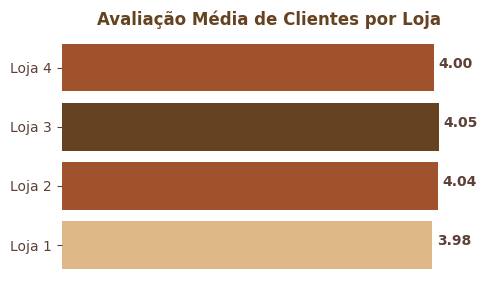

<Figure size 640x480 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt

lojas_lista = list(media_avaliacao_loja.keys())
avaliacoes_lista = list(media_avaliacao_loja.values())

melhor_avaliacao = max(avaliacoes_lista)
pior_avaliacao = min(avaliacoes_lista)

indice_melhor_avaliacao = avaliacoes_lista.index(melhor_avaliacao)
indice_pior_avaliacao = avaliacoes_lista.index(pior_avaliacao)

# Configurar cores na escala de marrom
cores_avaliacoes = ['#A0522D'] * len(avaliacoes_lista)  # Sienna como padrão
cores_avaliacoes[indice_melhor_avaliacao] = '#654321'  # Dark Brown - tom mais escuro para melhor avaliação
cores_avaliacoes[indice_pior_avaliacao] = '#DEB887'   # BurlyWood - tom mais claro para pior avaliação

fig, ax = plt.subplots(figsize=(5, 3))
bars = ax.barh(lojas_lista, avaliacoes_lista, color=cores_avaliacoes)

# Configurando rótulos com cor marrom
for i, v in enumerate(avaliacoes_lista):
    ax.text(v + 0.05, i, f'{v:.2f}', color='#5D4037', fontweight='bold')

# Configurando título e formatação
ax.set_title('Avaliação Média de Clientes por Loja', fontweight='bold', color='#654321')
ax.set_xlim(0, max(avaliacoes_lista) * 1.10)
ax.get_xaxis().set_visible(False)

# Alterando a cor dos ticks do eixo y para harmonizar
ax.tick_params(axis='y', colors='#5D4037')

# Removendo bordas do gráfico
ax.set_frame_on(False)

plt.tight_layout()
plt.show()

# salvando o gráfico
plt.savefig('avaliacao_clientes_lojas.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')

3. Categorias de produtos vendidos Loja 1 e Loja 4

In [20]:
# Venda por categoria por loja (Loja 1 e Loja 4)

#Loja 1
vendas_total_loja = loja['Categoria do Produto'].value_counts()
preco_total_loja = loja.groupby('Categoria do Produto')['Preço'].sum()

#Loja 4
vendas_total_loja4 = loja4['Categoria do Produto'].value_counts()
preco_total_loja4 = loja4.groupby('Categoria do Produto')['Preço'].sum()

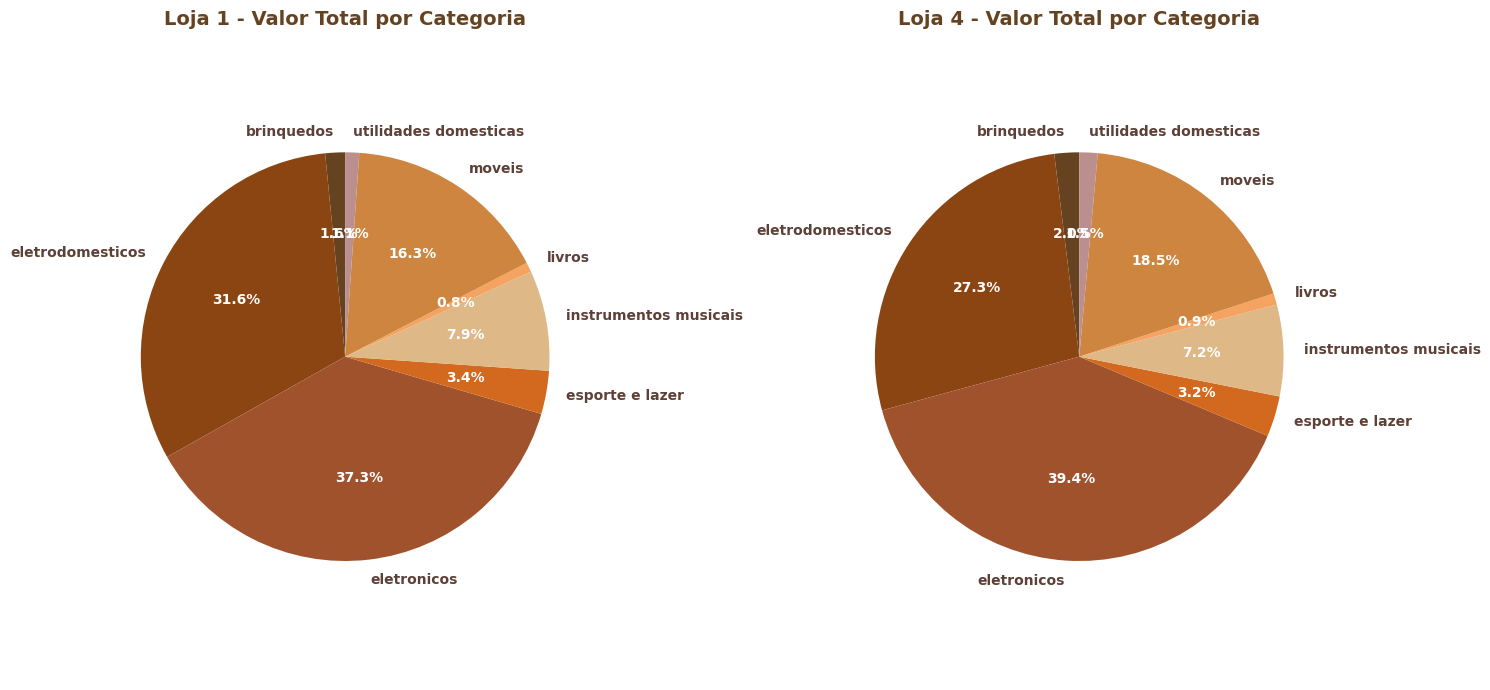

<Figure size 640x480 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt

# Definindo paleta de cores marrom para os gráficos de pizza
cores_marrom = [
    '#654321',  # Dark Brown
    '#8B4513',  # SaddleBrown
    '#A0522D',  # Sienna
    '#D2691E',  # Chocolate
    '#DEB887',  # BurlyWood
    '#F4A460',  # SandyBrown
    '#CD853F',  # Peru
    '#BC8F8F'   # RosyBrown
]

# criando o gráfico e os subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.subplots_adjust(hspace=0.2, wspace=0.5)

# criando os eixos Loja 1
wedges1, texts1, autotexts1 = ax1.pie(
    preco_total_loja.values,
    labels=preco_total_loja.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=cores_marrom[:len(preco_total_loja)],
    textprops={'color': '#5D4037', 'fontweight': 'bold'}
)

ax1.set_title('Loja 1 - Valor Total por Categoria', fontsize=14, fontweight='bold', color='#654321')

# criando os eixos Loja 4
wedges2, texts2, autotexts2 = ax2.pie(
    preco_total_loja4.values,
    labels=preco_total_loja4.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=cores_marrom[:len(preco_total_loja4)],
    textprops={'color': '#5D4037', 'fontweight': 'bold'}
)

ax2.set_title('Loja 4 - Valor Total por Categoria', fontsize=14, fontweight='bold', color='#654321')

# Configurando cor dos rótulos das categorias
for text in texts1:
    text.set_color('#5D4037')
    text.set_fontweight('bold')

for text in texts2:
    text.set_color('#5D4037')
    text.set_fontweight('bold')

# Configurando cor das porcentagens
for autotext in autotexts1:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

for autotext in autotexts2:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

# formatando os gráficos
for ax in fig.axes:
    ax.axis('equal')

plt.tight_layout()
plt.show()

# salvando os gráficos
plt.savefig('categorias_lojas.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')

## **Relatório Final para o Sr. João**

*Introdução*

Para este relatório, foram utilizadas as bases de vendas de produtos das lojas 1, 2, 3 e 4. Neste documento, você encontrará:

1. Faturamento & Ticket Médio (por loja)
2. Vendas por categoria (por loja e total)
4. Produtos mais vendidos (por loja e total)
5. Média de avaliações de clientes (por loja)
6. Frete Médio (por loja)

O objetivo deste relatório é apoiar a decisão de venda de uma das lojas devido a baixo desempenho.

*Desenvolvimento*

1. Faturamento x Ticket Médio (por loja)

É possível observar que a Loja 1 representa o Faturamento e Ticket-médios mais altos, enquanto a Loja 4 representa os mais baixos.

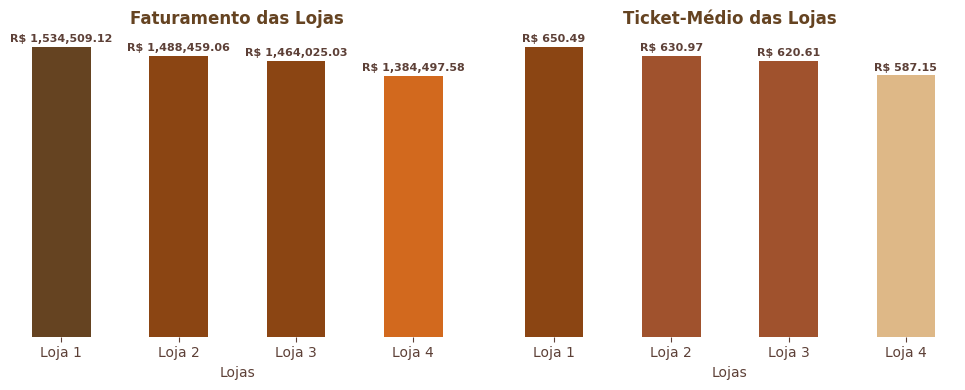

2. Vendas por categoria (por loja e total)
    
Por Loja (Quantidade)

<table>
  <tr>
    <th>Loja 1</th>
    <th>Loja 2</th>
    <th>Loja 3</th>
    <th>Loja 4</th>
  </tr>
  <tr>
    <td valign="top">
      <b>Categoria do Produto</b><br>
      móveis: 465<br>
      eletrônicos: 448<br>
      brinquedos: 324<br>
      eletrodomésticos: 312<br>
      esporte e lazer: 284<br>
      instrumentos musicais: 182<br>
      livros: 173<br>
      utilidades domésticas: 171
    </td>
    <td valign="top">
      <b>Categoria do Produto</b><br>
      móveis: 442<br>
      eletrônicos: 422<br>
      brinquedos: 313<br>
      eletrodomésticos: 305<br>
      esporte e lazer: 275<br>
      instrumentos musicais: 224<br>
      livros: 197<br>
      utilidades domésticas: 181
    </td>
    <td valign="top">
      <b>Categoria do Produto</b><br>
      móveis: 499<br>
      eletrônicos: 451<br>
      brinquedos: 315<br>
      eletrodomésticos: 278<br>
      esporte e lazer: 277<br>
      livros: 185<br>
      instrumentos musicais: 177<br>
      utilidades domésticas: 177
    </td>
    <td valign="top">
      <b>Categoria do Produto</b><br>
      móveis: 480<br>
      eletrônicos: 451<br>
      brinquedos: 338<br>
      esporte e lazer: 277<br>
      eletrodomésticos: 254<br>
      utilidades domésticas: 201<br>
      livros: 187<br>
      instrumentos musicais: 170
    </td>
  </tr>
</table>

  Total agregado (Quantidade)

- **móveis**: 1.886
- **eletrônicos**: 1.772
- **brinquedos**: 1.290
- **eletrodomésticos**: 1.149
- **esporte e lazer**: 1.113
- **instrumentos musicais**: 753
- **livros**: 742
- **utilidades domésticas**: 730

Loja 1 e 4 (Total por Preço)

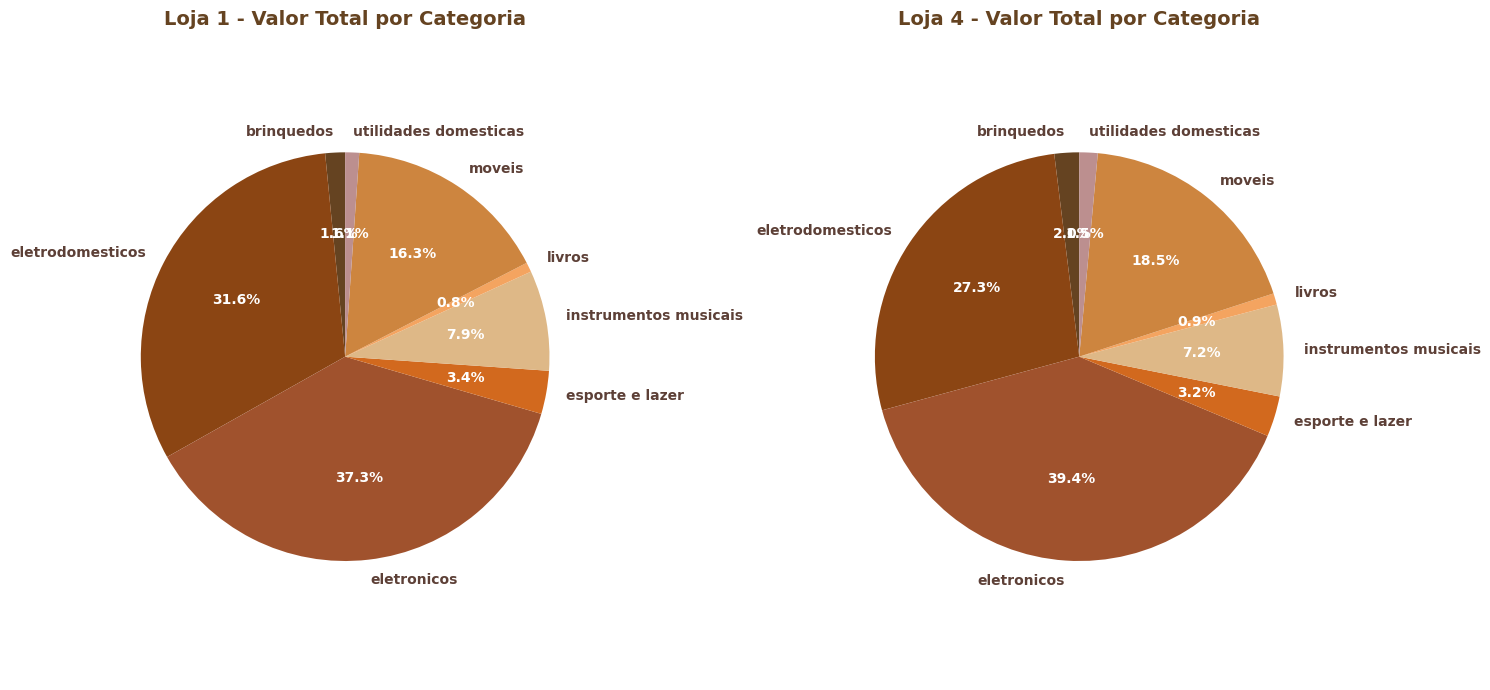

É possível observar que a categoria de móveis é a mais vendida em todas as lojas, no entanto a categoria de eletrônicos é a que representa o maior valor ($) em vendas, tanto na Loja 1 quanto na Loja 4.
A categoria de móveis representa menos de 20% do faturamento.
Uma ação interessante a se pensar é da loja promover como estratégia o crescimento da venda de eletrônicos.

4. Produtos mais vendidos (por loja e total)

| Produto | Loja 1 | Loja 2 | Loja 3 | Loja 4 | Total |
|---------|--------|--------|--------|--------|-------|
| Cômoda | 56 | 44 | 55 | 55 | 210 |
| Bateria | 53 | 61 | 41 | 48 | 203 |
| Carrinho controle remoto | 52 | 47 | 52 | 55 | 206 |
| Micro-ondas | 60 | 62 | 36 | 48 | 206 |
| Cama king | 44 | 45 | 56 | 56 | 201 |
| Jogo de panelas | 43 | 52 | 55 | 50 | 200 |
| Modelagem preditiva | 51 | 46 | 53 | 50 | 200 |
| Secadora de roupas | 58 | 57 | 45 | 40 | 200 |
| Blocos de montar | 56 | 54 | 35 | 54 | 199 |
| Cama box | 44 | 47 | 46 | 62 | 199 |
| Celular Plus X42 | 49 | 55 | 46 | 48 | 198 |
| Bola de basquete | 55 | 42 | 50 | 50 | 197 |
| Guarda roupas | 60 | 54 | 49 | 34 | 197 |
| Pandeiro | 36 | 58 | 51 | 52 | 197 |
| Bicicleta | 54 | 45 | 52 | 45 | 196 |
| Iniciando em programação | 41 | 65 | 46 | 43 | 195 |
| Smart TV | 44 | 40 | 54 | 54 | 192 |
| Geladeira | 54 | 49 | 50 | 38 | 191 |
| Faqueiro | 52 | 39 | 39 | 59 | 189 |
| Lava louças | 48 | 46 | 52 | 43 | 189 |
| Impressora | 54 | 34 | 50 | 50 | 188 |
| Kit banquetas | 44 | 45 | 57 | 42 | 188 |
| Violão | 46 | 58 | 47 | 37 | 188 |
| Copo térmico | 54 | 47 | 38 | 48 | 187 |
| Fogão | 45 | 42 | 53 | 47 | 187 |
| TV Led UHD 4K | 60 | 45 | 42 | 40 | 187 |
| Corda de pular | 40 | 50 | 53 | 43 | 186 |
| Mesa de jantar | 40 | 34 | 56 | 55 | 185 |
| Bola de vôlei | 42 | 46 | 48 | 48 | 184 |
| Sofá retrátil | 46 | 44 | 45 | 47 | 182 |
| Cadeira de escritório | 46 | 49 | 46 | 40 | 181 |
| Dashboards com Power BI | 42 | 43 | 40 | 56 | 181 |
| Cubo mágico 8x8 | 44 | 45 | 44 | 47 | 180 |
| Xadrez de madeira | 49 | 45 | 47 | 39 | 180 |
| Tablet ABXY | 42 | 44 | 48 | 45 | 179 |
| Lavadora de roupas | 47 | 49 | 42 | 38 | 176 |
| Boneca bebê | 40 | 48 | 39 | 48 | 175 |
| Dinossauro Rex | 40 | 42 | 46 | 47 | 175 |
| Jogo de tabuleiro | 43 | 32 | 52 | 48 | 175 |
| Mesa de centro | 44 | 45 | 42 | 44 | 175 |
| Fone de ouvido | 50 | 37 | 43 | 44 | 174 |
| Panela de pressão | 35 | 44 | 47 | 46 | 172 |
| Smartwatch | 43 | 44 | 46 | 39 | 172 |
| Jogo de copos | 41 | 46 | 36 | 46 | 169 |
| Poltrona | 41 | 35 | 47 | 45 | 168 |
| Assistente virtual | 40 | 38 | 39 | 50 | 167 |
| Ciência de dados com python | 39 | 43 | 46 | 38 | 166 |
| Guitarra | 47 | 47 | 38 | 33 | 165 |
| Mochila | 39 | 45 | 36 | 43 | 163 |
| Headset | 33 | 44 | 39 | 42 | 158 |
| Celular ABXY | 33 | 41 | 44 | 39 | 157 |

É possível observar que existe uma gama diversa de produtos oferecidos pelas lojas. Talvez seja interessante realizar uma análise de margem de lucro de cada produto e entender se é viável descartar alguns produtos e especializar a loja em algumas categorias mais relevantes para o faturamento e lucro.

5. Avaliações Média de Clientes (por loja)

* Loja 1: 3.98
* Loja 2: 4.04
* Loja 3: 4.05
* Loja 4: 4.00

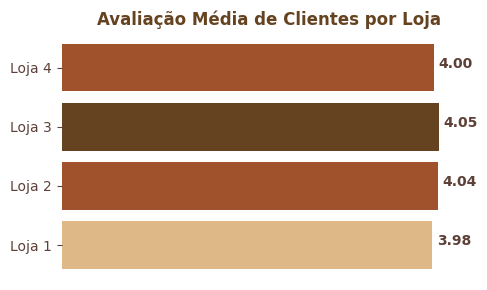

A Loja 3 é a que possui melhor avaliação de clientes, com nota 4.05. Enquanto isso, a Loja 1 é a que possui pior avaliação, de 3.98.

6. Frete Médio (por loja)

* Loja 1: 34.69
* Loja 2: 33.62
* Loja 3: 33.07
* Loja 4: 31.28

A Loja 1 é a que possui maior frete, enquanto a Loja 4 é a de menor frete.

*Conclusão*

A partir da análise realizada, podemos destacar duas lojas: A Loja 1 e a Loja 4.

Pontos negativos:
*   Loja 1: frete mais alto, pior avaliação de clientes.
*   Loja 4: faturamento mais baixo e ticket-médio mais baixo.

Pontos positivos:
* Loja 1: maior faturamento e ticket-médio mais alto.
* Loja 4: melhor avaliação de clientes e frete mais barato.

A decisão que deve ser tomada deve levar em consideração se é mais importante para o Sr. João ter um faturamento mais alto (e, no caso, a Loja 1 deve ser mantida), ou se ele prefere ter uma avaliação de clientes melhor e priorizar aumentar o faturamento da Loja 4.

Sugerimos que ambas as lojas sejam consideradas para fechamento e, se a decisão for estritamente financeira, a Loja 4 deverá ser fechada.

# DESAFIO EXTRA

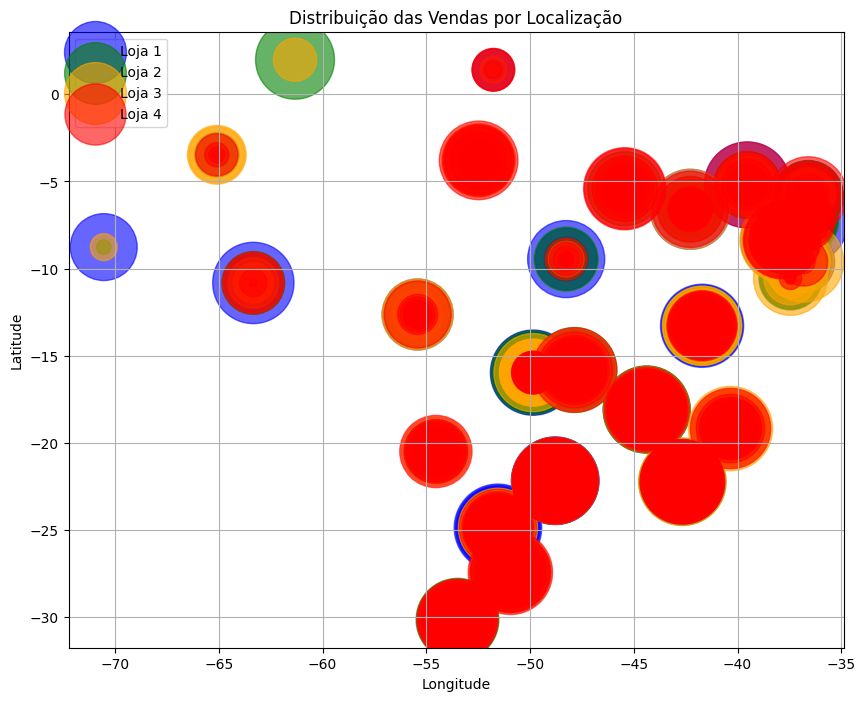

In [22]:
# Desafio Extra

plt.figure(figsize=(10, 8))

plt.scatter(loja['lon'], loja['lat'],
            s=loja['Preço'],
            alpha=0.6, label='Loja 1', c='blue')

plt.scatter(loja2['lon'], loja2['lat'],
            s=loja2['Preço'],
            alpha=0.6, label='Loja 2', c='green')

plt.scatter(loja3['lon'], loja3['lat'],
            s=loja3['Preço'],
            alpha=0.6, label='Loja 3', c='orange')

plt.scatter(loja4['lon'], loja4['lat'],
            s=loja4['Preço'],
            alpha=0.6, label='Loja 4', c='red')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribuição das Vendas por Localização')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

<ipython-input-35-b043f9cb5d9a>:166: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax6.boxplot(vendas_por_loja, labels=labels_loja, patch_artist=True)


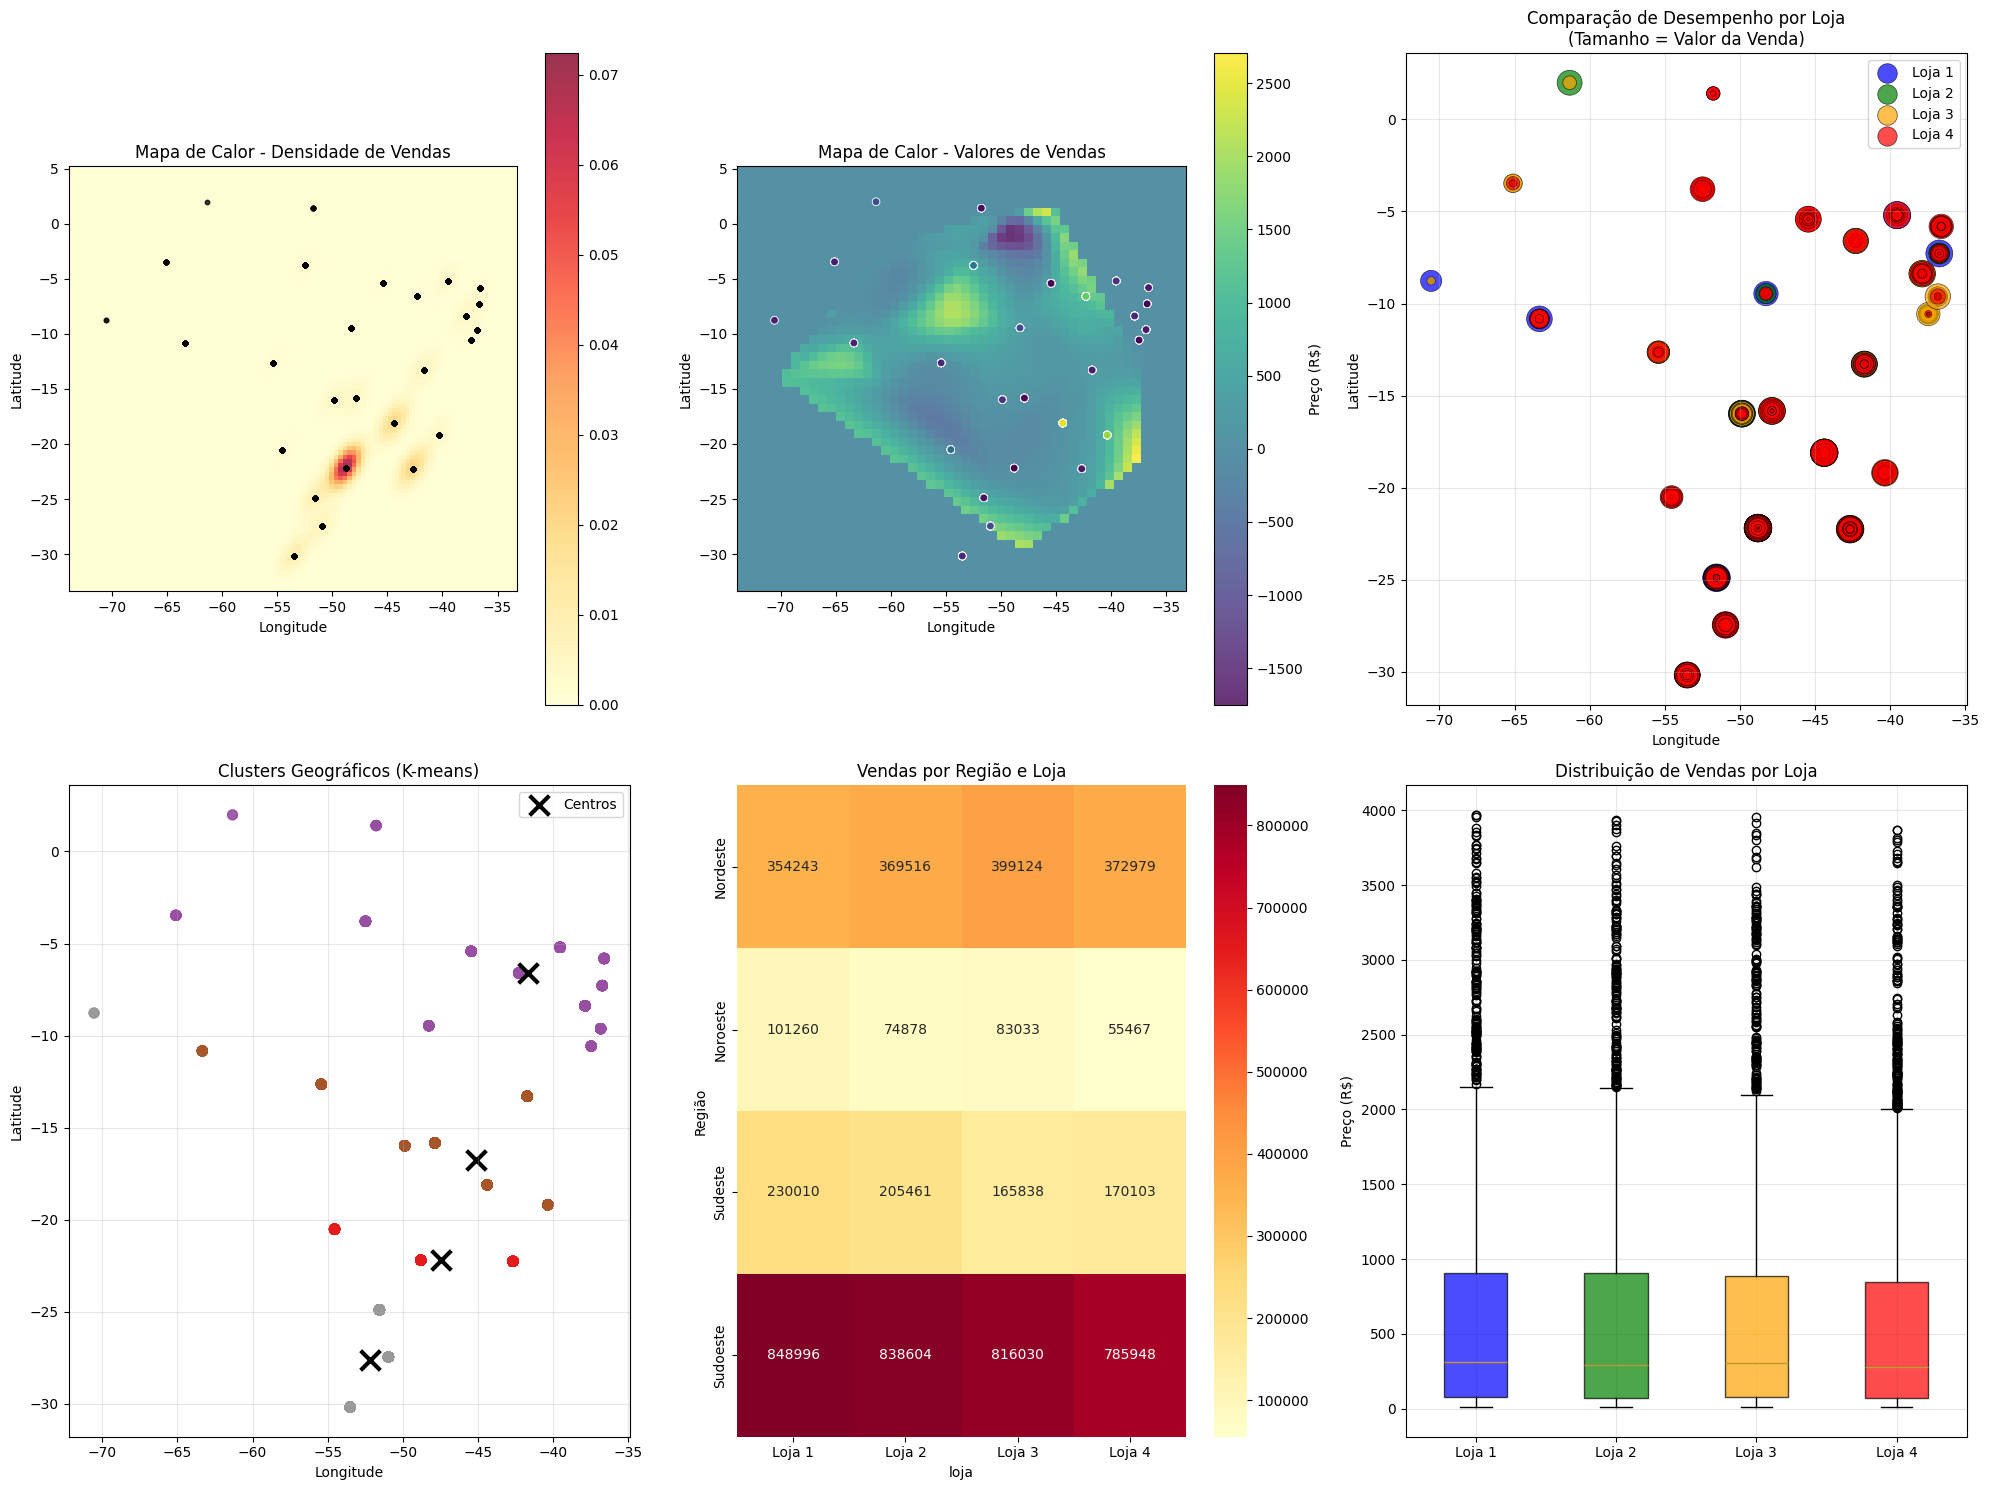

=== ANÁLISE DETALHADA DOS PADRÕES GEOGRÁFICOS ===

1. VENDAS POR REGIÃO:
                 sum        mean  count
regiao                                 
Nordeste  1495862.69  610.307095   2451
Noroeste   314637.63  661.003424    476
Sudeste    771412.90  636.479290   1212
Sudoeste  3289577.57  621.143801   5296

2. DISPERSÃO GEOGRÁFICA:
Loja 1: Dispersão = 6.8089
Loja 2: Dispersão = 6.7598
Loja 3: Dispersão = 6.8914
Loja 4: Dispersão = 6.8423

3. CORRELAÇÃO LOCALIZAÇÃO-VENDAS:
Correlação Latitude-Preço: -0.0103
Correlação Longitude-Preço: -0.0093

4. OUTLIERS GEOGRÁFICOS:
Outliers em latitude: 1288
Outliers em longitude: 281

=== RECOMENDAÇÕES ESTRATÉGICAS ===
Região com maior faturamento: Sudoeste (R$ 3289577.57)
Loja com maior faturamento: Loja 1

Para expansão, considerar regiões próximas a Sudoeste


In [35]:
# Análise Extra (Expansão Geográfica)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

# Configurar o estilo dos gráficos
plt.style.use('default')
sns.set_palette("husl")

# Criar figura com subplots
fig = plt.figure(figsize=(20, 15))

# 1. Heatmap de densidade usando KDE
ax1 = plt.subplot(2, 3, 1)

# Combinar todos os dados
todos_dados = pd.concat([
    loja.assign(loja='Loja 1'),
    loja2.assign(loja='Loja 2'),
    loja3.assign(loja='Loja 3'),
    loja4.assign(loja='Loja 4')
])

# Criar grid para o heatmap
lon_min, lon_max = todos_dados['lon'].min(), todos_dados['lon'].max()
lat_min, lat_max = todos_dados['lat'].min(), todos_dados['lat'].max()

# Expandir um pouco os limites
lon_range = lon_max - lon_min
lat_range = lat_max - lat_min
lon_min -= lon_range * 0.1
lon_max += lon_range * 0.1
lat_min -= lat_range * 0.1
lat_max += lat_range * 0.1

# Criar grid
xx, yy = np.mgrid[lon_min:lon_max:100j, lat_min:lat_max:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])

# Calcular densidade usando KDE
values = np.vstack([todos_dados['lon'], todos_dados['lat']])
kernel = gaussian_kde(values)
density = np.reshape(kernel(positions).T, xx.shape)

# Plotar heatmap
im1 = ax1.imshow(np.rot90(density), cmap='YlOrRd', extent=[lon_min, lon_max, lat_min, lat_max], alpha=0.8)
ax1.scatter(todos_dados['lon'], todos_dados['lat'], c='black', s=10, alpha=0.5)
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title('Mapa de Calor - Densidade de Vendas')
plt.colorbar(im1, ax=ax1)

# 2. Heatmap de valores de vendas
ax2 = plt.subplot(2, 3, 2)

# Criar grid para valores
from scipy.interpolate import griddata

# Preparar dados para interpolação
points = todos_dados[['lon', 'lat']].values
values_vendas = todos_dados['Preço'].values

# Criar grid regular
grid_lon, grid_lat = np.mgrid[lon_min:lon_max:50j, lat_min:lat_max:50j]

# Interpolar valores
grid_vendas = griddata(points, values_vendas, (grid_lon, grid_lat), method='cubic', fill_value=0)

# Plotar heatmap de valores
im2 = ax2.imshow(grid_vendas, extent=[lon_min, lon_max, lat_min, lat_max],
                 cmap='viridis', alpha=0.8, origin='lower')
ax2.scatter(todos_dados['lon'], todos_dados['lat'],
           c=todos_dados['Preço'], cmap='viridis', s=30, edgecolors='white', linewidth=0.5)
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_title('Mapa de Calor - Valores de Vendas')
plt.colorbar(im2, ax=ax2, label='Preço (R$)')

# 3. Comparação de desempenho por loja
ax3 = plt.subplot(2, 3, 3)

cores = ['blue', 'green', 'orange', 'red']
lojas_dados = [
    (loja, 'Loja 1'),
    (loja2, 'Loja 2'),
    (loja3, 'Loja 3'),
    (loja4, 'Loja 4')
]

for i, (dados_loja, nome_loja) in enumerate(lojas_dados):
    # Calcular média de vendas por região (usando bins)
    lat_bins = np.linspace(lat_min, lat_max, 10)
    lon_bins = np.linspace(lon_min, lon_max, 10)

    # Criar scatter plot com tamanho proporcional ao valor
    scatter = ax3.scatter(dados_loja['lon'], dados_loja['lat'],
                         s=dados_loja['Preço']/10, c=cores[i],
                         alpha=0.7, label=nome_loja, edgecolors='black', linewidth=0.5)

ax3.set_xlabel('Longitude')
ax3.set_ylabel('Latitude')
ax3.set_title('Comparação de Desempenho por Loja\n(Tamanho = Valor da Venda)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Análise de clusters geográficos
ax4 = plt.subplot(2, 3, 4)

from sklearn.cluster import KMeans

# Aplicar K-means para identificar clusters geográficos
coords = todos_dados[['lat', 'lon']].values
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(coords)

# Plotar clusters
scatter = ax4.scatter(todos_dados['lon'], todos_dados['lat'],
                     c=clusters, cmap='Set1', s=50, alpha=0.7)
ax4.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0],
           c='black', marker='x', s=200, linewidths=3, label='Centros')
ax4.set_xlabel('Longitude')
ax4.set_ylabel('Latitude')
ax4.set_title('Clusters Geográficos (K-means)')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Distribuição de vendas por região
ax5 = plt.subplot(2, 3, 5)

# Dividir em regiões geográficas
lat_centro = todos_dados['lat'].median()
lon_centro = todos_dados['lon'].median()

# Classificar por quadrantes
def classificar_regiao(lat, lon):
    if lat > lat_centro and lon > lon_centro:
        return 'Nordeste'
    elif lat > lat_centro and lon <= lon_centro:
        return 'Noroeste'
    elif lat <= lat_centro and lon > lon_centro:
        return 'Sudeste'
    else:
        return 'Sudoeste'

todos_dados['regiao'] = todos_dados.apply(lambda x: classificar_regiao(x['lat'], x['lon']), axis=1)

# Calcular vendas por região e loja
vendas_regiao = todos_dados.groupby(['regiao', 'loja'])['Preço'].sum().unstack(fill_value=0)

# Criar heatmap
sns.heatmap(vendas_regiao, annot=True, fmt='.0f', cmap='YlOrRd', ax=ax5)
ax5.set_title('Vendas por Região e Loja')
ax5.set_ylabel('Região')

# 6. Análise temporal-espacial (se houver dados de data)
ax6 = plt.subplot(2, 3, 6)

# Box plot de vendas por loja
vendas_por_loja = [loja['Preço'], loja2['Preço'], loja3['Preço'], loja4['Preço']]
labels_loja = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

box_plot = ax6.boxplot(vendas_por_loja, labels=labels_loja, patch_artist=True)

# Colorir as caixas
for patch, cor in zip(box_plot['boxes'], cores):
    patch.set_facecolor(cor)
    patch.set_alpha(0.7)

ax6.set_ylabel('Preço (R$)')
ax6.set_title('Distribuição de Vendas por Loja')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análise detalhada
print("=== ANÁLISE DETALHADA DOS PADRÕES GEOGRÁFICOS ===\n")

# 1. Estatísticas por região
print("1. VENDAS POR REGIÃO:")
vendas_regiao_total = todos_dados.groupby('regiao')['Preço'].agg(['sum', 'mean', 'count'])
print(vendas_regiao_total)
print()

# 2. Análise de dispersão geográfica
print("2. DISPERSÃO GEOGRÁFICA:")
for dados_loja, nome_loja in lojas_dados:
    lat_std = dados_loja['lat'].std()
    lon_std = dados_loja['lon'].std()
    dispersao = np.sqrt(lat_std**2 + lon_std**2)
    print(f"{nome_loja}: Dispersão = {dispersao:.4f}")
print()

# 3. Correlação entre localização e vendas
print("3. CORRELAÇÃO LOCALIZAÇÃO-VENDAS:")
correlacao_lat = todos_dados['lat'].corr(todos_dados['Preço'])
correlacao_lon = todos_dados['lon'].corr(todos_dados['Preço'])
print(f"Correlação Latitude-Preço: {correlacao_lat:.4f}")
print(f"Correlação Longitude-Preço: {correlacao_lon:.4f}")
print()

# 4. Identificar outliers geográficos
print("4. OUTLIERS GEOGRÁFICOS:")
Q1_lat = todos_dados['lat'].quantile(0.25)
Q3_lat = todos_dados['lat'].quantile(0.75)
IQR_lat = Q3_lat - Q1_lat
outliers_lat = todos_dados[(todos_dados['lat'] < Q1_lat - 1.5*IQR_lat) |
                          (todos_dados['lat'] > Q3_lat + 1.5*IQR_lat)]

Q1_lon = todos_dados['lon'].quantile(0.25)
Q3_lon = todos_dados['lon'].quantile(0.75)
IQR_lon = Q3_lon - Q1_lon
outliers_lon = todos_dados[(todos_dados['lon'] < Q1_lon - 1.5*IQR_lon) |
                          (todos_dados['lon'] > Q3_lon + 1.5*IQR_lon)]

print(f"Outliers em latitude: {len(outliers_lat)}")
print(f"Outliers em longitude: {len(outliers_lon)}")

# 5. Recomendações estratégicas
print("\n=== RECOMENDAÇÕES ESTRATÉGICAS ===")
melhor_regiao = vendas_regiao_total.loc[vendas_regiao_total['sum'].idxmax()]
print(f"Região com maior faturamento: {vendas_regiao_total['sum'].idxmax()} (R$ {melhor_regiao['sum']:.2f})")

melhor_loja = todos_dados.groupby('loja')['Preço'].sum().idxmax()
print(f"Loja com maior faturamento: {melhor_loja}")

print(f"\nPara expansão, considerar regiões próximas a {vendas_regiao_total['sum'].idxmax()}")